In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.lines as mlines
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

# Part 1: Closed-Form Linear Regression

## Task 1: Linear Regression

Write a function `linear_regression` that fits a linear regression model, and takes the following two arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of data points, and `d` is the data dimension. Do not assume anything about `N` or `d` other than being a positive integer. `X` is the matrix consisting of all the input features in the training set.
2. `Y`: A numpy array of the shape `(N,)` where `N` is the number of data points. `Y` is the vector of outputs for the data in the training set.


and returns the linear regression weight vector 
$$\theta=\begin{bmatrix} \theta_0\\ \theta_1\\ \cdots \\ \theta_d \end{bmatrix}$$
which is a numpy array with a shape of `(d+1,1)`. Notice that $\theta$ has one more dimension than the inputs because of the constant $\theta_0$. Your function should:

1. **Have an Intercept Weight**: In other words, your fitting model should be minimizing the following mean-squared loss $$\mathcal{J}(\theta; X, Y) = \frac{1}{N}\sum_{i=1}^N \frac{1}{2}\big(y^{(i)} - (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} +\cdots +\theta_d x_d^{(i)})\big)^2$$ An easy way to do this is by concatenating a constant 1-column to the data matrix, which can be done by doing the following:
    ```
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1)
    ```

    
    
2. **Never Raise An Error, and Return the Solution with the Smallest Euclidean Norm** in case the optimal weight vector is not unique. For instance, when the number of data points is smaller than the dimension, many optimal weight vectors exist. Recall that the ordinary least squares solution is given by the using the Moore-Penrose pseudo-inverse and is given by $$\theta = (X_+^\intercal X_+)^+X_+^\intercal y$$ where $X_+$ is the matrix obtained from $X$ by concatenating a constant 1-column and $(X_+^\intercal X_+)^+$ is the Moore-Penrose pseudo-inverse of the matrix $X_+^\intercal X_+$.

    **Hint**: In python, the Moore-Penrose pseudo-inverse of a numpy array `A` of shape `(d,d)` can be computed as `np.linalg.pinv(A)`.
    


In [2]:
#grade

def linear_regression(X,Y):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N
    
    Y_col = Y.reshape(-1,1)
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1)

    ### WRITE YOUR CODE HERE
    
    theta = np.linalg.pinv((X_constant.T @ X_constant)) @ X_constant.T@Y_col


    ### END STUDENT CODE
    
    return theta

In [3]:
# SAMPLE TEST CASE
some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_Y = np.sum(some_X, axis=1)
some_theta = linear_regression(some_X, some_Y)
assert np.array_equal(some_theta.round(3), np.array([[ 0.],
                                                    [ 1.],
                                                    [ 1.],
                                                    [ 1.],
                                                    [ 1.],
                                                    [ 1.]]))


## Task 2: Linear Predict

Write a function `linear_predict` that given the learned weights in the `linear_regression` function predicts the labels. Your function should take the following two arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of data points, and `d` is the data dimension. Do not assume anything about `N` or `d` other than being a positive integer. Like before this is the input features in the training set.
2. `theta`: A numpy array of the shape `(d+1,1)` where `d` is the data dimension
$$\theta=\begin{bmatrix} \theta_0\\ \theta_1\\ \cdots \\ \theta_d \end{bmatrix}$$

Your function should produce the $\hat{y}$ numpy array with the shape of `(N,)`, whose $i^{th}$ element is defined as
$$\hat{y}^{(i)} = \theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} +\cdots +\theta_d x_d^{(i)}$$.

**Hint**: You may want to concatenate a constant 1-column to the data matrix `X` before you start computing $\hat{y}$.

In [4]:
#grade

def linear_predict(X,theta):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert theta.shape == (d+1,1)
    
    ### DONT FORGET TO CREATE TO CONCATENATE A COLUMN OF ONES TO X
    ### WRITE YOUR CODE HERE
    X = np.concatenate([np.ones((N,1)), X], axis=1)
    y_hat = X@theta

    ### END STUDENT CODE
    
    y_hat = y_hat.reshape(-1)
    return y_hat

In [5]:
# SAMPLE TEST CASE

some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_theta = 2.**(-np.arange(6).reshape(-1,1))
some_yhat = linear_predict(some_X, some_theta)
assert np.array_equal(some_yhat.round(3), np.array([ 3.062,  9.156,  6.188, 15.719,  3.062,  9.281,  7.062]))

## Task 3: Linear Residual

Using the `linear_predict` function you wrote in the previous part, write a function `linear_residuals` that given the learned weights in the `linear_regression` function calculates the residuals vector. Your function should take the following arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of data points, and `d` is the data dimension. Do not assume anything about `N` or `d` other than being a positive integer. As before this is the input features in the training set.
2. `theta`: A numpy array of the shape `(d+1,1)` where `d` is the data dimension
$$\theta=\begin{bmatrix} \theta_0\\ \theta_1\\ \cdots \\ \theta_d \end{bmatrix}$$


3. `Y`: A numpy array of the shape `(N,)` where `N` is the number of data points. These are the outputs for the data in the training set.

Your function should produce the numpy array `e` with the shape of `(N,)`, whose $i^{th}$ element is defined as
$$e^{(i)} = {y}^{(i)} - (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} +\cdots +\theta_d x_d^{(i)})$$.


In [6]:
#grade

def linear_residuals(X,theta,Y):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert theta.shape == (d+1,1)
    assert Y.shape == (N,)
    
    ### WRITE YOUR CODE HERE
    y_hat = linear_predict(X,theta)
    e = Y - y_hat

    ### END STUDENT CODE
    
    e = e.reshape(-1)
    return e

In [7]:
# SAMPLE TEST CASE

some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_theta = 2.**(-np.arange(6).reshape(-1,1))
some_Y = np.sum(some_X, axis=1)
some_res = linear_residuals(some_X, some_theta, some_Y)
assert np.array_equal(some_res.round(3), np.array([16.938, 35.844, 33.812, 59.281, 16.938, 39.719, 16.938]))

## Task 4 Real Data Application

### Description
A dataset containing the blood sulfate measured in a Baboon can be found at http://www.statsci.org/data/general/brunhild.html. The observations are recorded as a function of time and there are 21 records in the file.


### Information Summary
**Input/Output**: This data has two columns; the first is the time of measurement with the unit being an hour since the radioactive material injection, and the second column is the blood sulfate levels in the unit of Geiger counter counts times $10^{−4}$.

**Missing Data**: There is no missing data.

**Final Goal**: We want to properly fit a linear regression model.

In [8]:
df_1 = pd.read_csv('brunhild.txt', sep='\t')
df_1

,Hours,Sulfate
0,2,15.11
1,4,11.36
2,6,9.77
3,8,9.09
4,10,8.48
5,15,7.69
6,20,7.33
7,25,7.06
8,30,6.70
9,40,6.43


### Regression

We apply linear regression to this dataset. First, we apply linear regression to the original coordinates, and then, we apply linear regression in the log-log coordinate. You should see the results and compare them. We use the code that you implemented in the previous tasks.

**Attention**: Although you are not adding any code in this part, you should see the results, compare them, and think about what is going on. 

The following two functions will be useful to draw regression plots.

In [9]:
def newline(p1, p2, ax):
    # This code was borrowed from 
    # https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

def draw_regression(X,Y,beta,ax):
    ax.scatter(X, Y, c='b', marker='o')
    line_obj = newline([0, np.sum(beta*np.array([[1],[0]]))], [2, np.sum(beta*np.array([[1],[2]]))], ax)
    line_obj.set_color('black')
    line_obj.set_linestyle('--')
    line_obj.set_linewidth(2)
    return ax

### Regression in the Original Coordinates

Now, we find the linear regression in the original coordinates. For this, we use the linear_regression and linear_residuals functions that you implemented previously. 

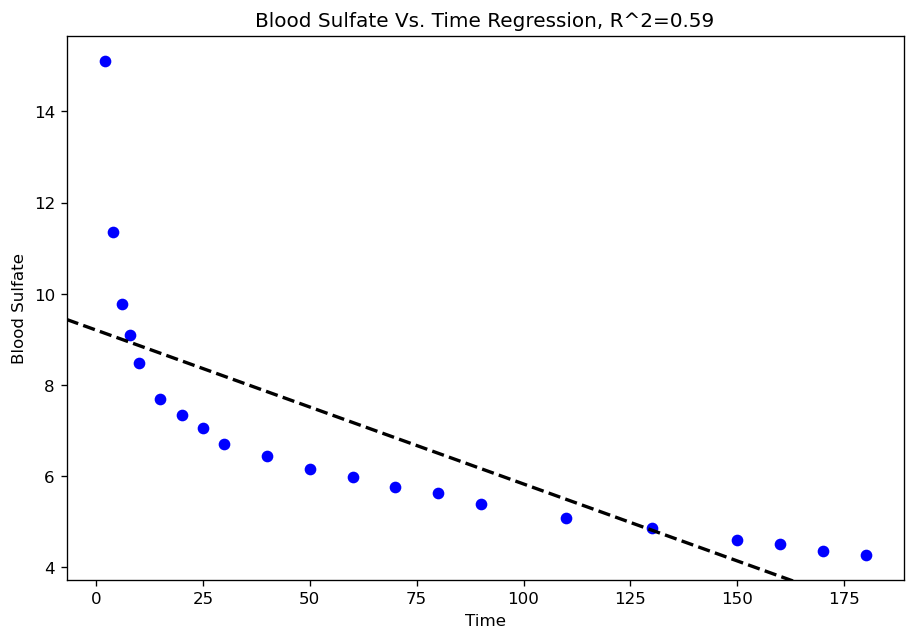

In [10]:
X_1 = df_1['Hours'].values.reshape(-1,1)
Y_1 = df_1['Sulfate'].values.reshape(-1)

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

theta_1 = linear_regression(X_1,Y_1)
ax = draw_regression(X_1,Y_1,theta_1,ax)

residuals_1 = linear_residuals(X_1, theta_1, Y_1)
fitted_1 = linear_predict(X_1, theta_1)
r2_1 = r2_score(Y_1, fitted_1) #computes the R^2 score

ax.set_xlabel('Time')
ax.set_ylabel('Blood Sulfate')
_ = ax.set_title('Blood Sulfate Vs. Time Regression, R^2=%.2f' %r2_1)

Lets compare our result with an off-the-shelf package. The package`seaborn` does the whole linear regression process in a single line. Let's try that, and see how it matches with our plot.


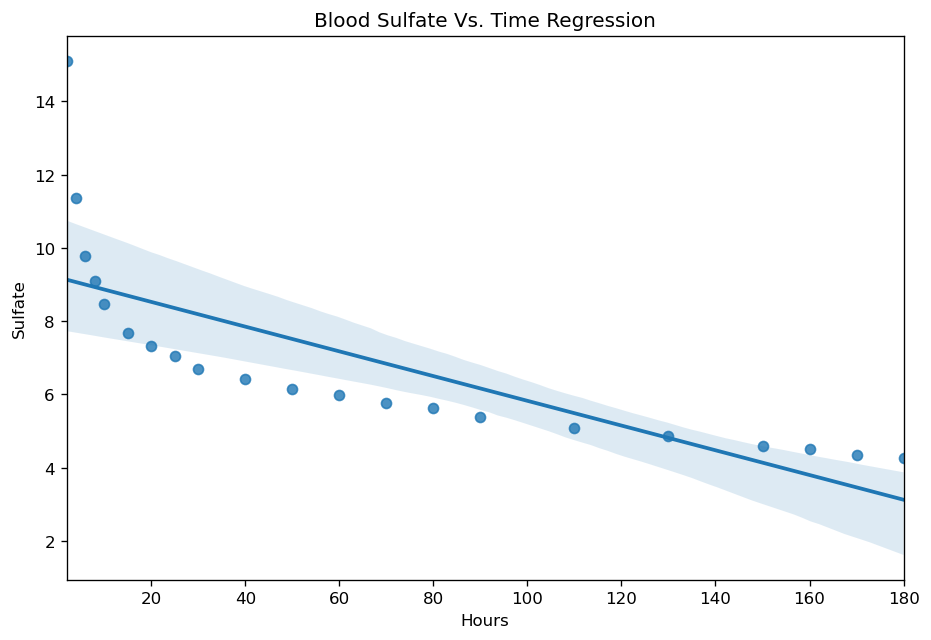

In [11]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
sns.regplot(x='Hours', y='Sulfate', data=df_1, ax=ax)
_ = ax.set_title('Blood Sulfate Vs. Time Regression')

Now we draw the residuals against the fitted values.

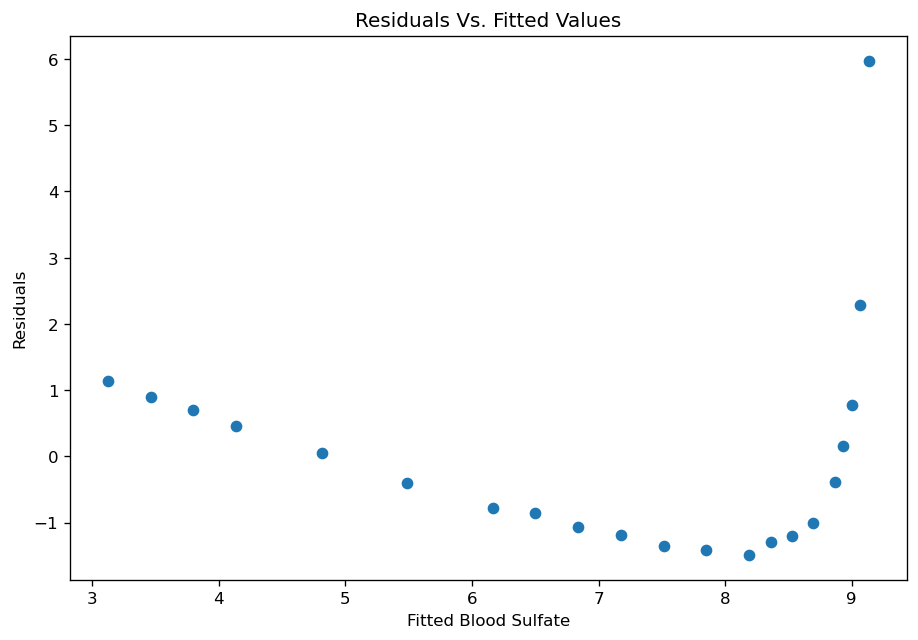

In [12]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
ax.scatter(fitted_1, residuals_1)

ax.set_xlabel('Fitted Blood Sulfate')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Values')

### Regression in the Log-Log Coordinates
Next, we find the linear regression for the log of the blood sulfate level against the log of time. We first use the linear_regression and linear_residuals functions that you implemented above.

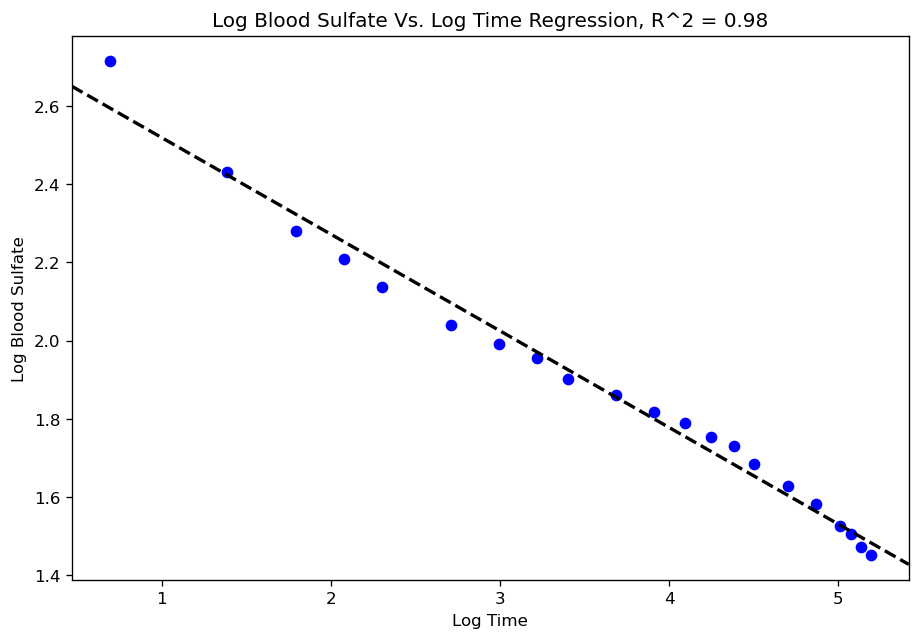

In [13]:
log_X_1 = np.log(df_1['Hours'].values.reshape(-1,1))
log_Y_1 = np.log(df_1['Sulfate'].values.reshape(-1))

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

theta_1_log = linear_regression(log_X_1,log_Y_1)
residuals_1_log = linear_residuals(log_X_1, theta_1_log, log_Y_1)
fitted_1_log = linear_predict(log_X_1, theta_1_log)

r2_1_log = r2_score(log_Y_1, fitted_1_log) #computes the R^2 score

ax = draw_regression(log_X_1,log_Y_1,theta_1_log,ax)

ax.set_xlabel('Log Time')
ax.set_ylabel('Log Blood Sulfate')
_ = ax.set_title('Log Blood Sulfate Vs. Log Time Regression, R^2 = %.2f' %r2_1_log)

We also compare our plot with the `seaborn` package.


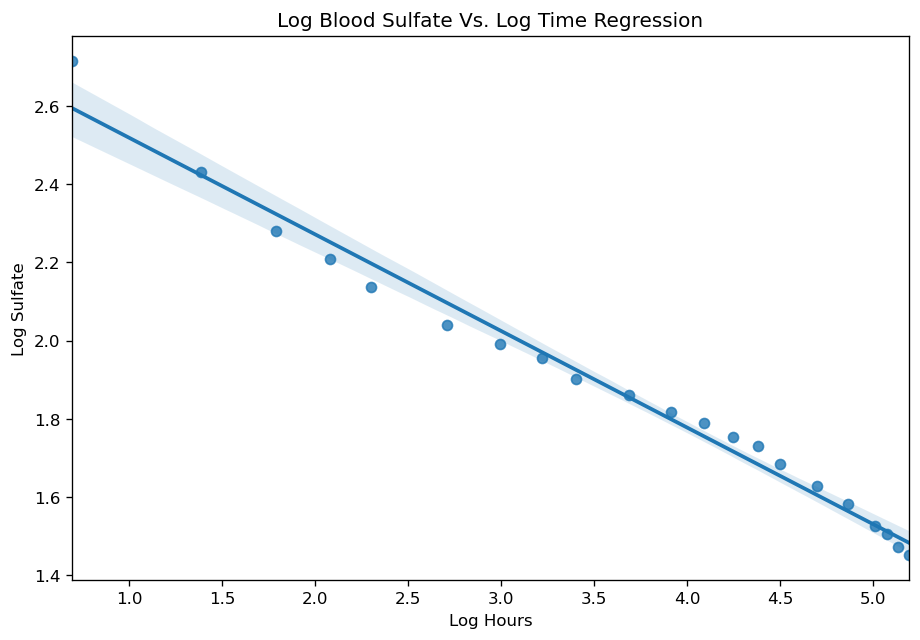

In [14]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
log_df_1 = df_1.copy(deep=True)
log_df_1['Log Hours'] = np.log(df_1['Hours'])
log_df_1['Log Sulfate'] = np.log(df_1['Sulfate'])
sns.regplot(x='Log Hours', y='Log Sulfate', data=log_df_1, ax=ax)
_ = ax.set_title('Log Blood Sulfate Vs. Log Time Regression')

We also plot the residuals against fitted log blood sulfate.

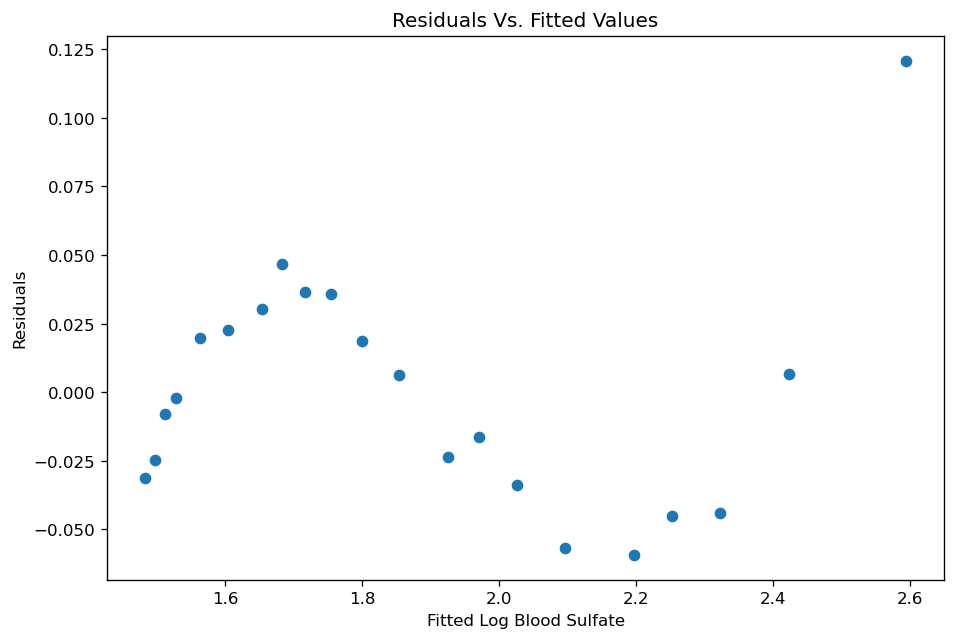

In [15]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
ax.scatter(fitted_1_log, residuals_1_log)

ax.set_xlabel('Fitted Log Blood Sulfate')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Values')

**Remark:** In practice, a valid linear regression should have normally distributed residuals. The residual or error should not have any pattern and should be random. In another word, look at the pattern of the original sulfate data, we may guess its pattern is a curve but not a straight line. In that case, a simple linear regression actually should not be fitted into the original data. For example, if $y = x^2$, the curve is not a simple straight line. But if we do $y' = \log{y} = \log{x^2} = 2\log{x} = 2x'$, then we have $y'=2x'$, which is a straight line, where simple linear regression could make sense and be valid.

# Part 2: Gradient Descent Linear Regression

## Task 5 Gradient Descent

Write a function `linear_gradient_descent` that fits a linear regression model using **gradient descent** instead of the closed form equation, and takes the following two arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of data points, and `d` is the data dimension. Do not assume anything about `N` or `d` other than being a positive integer. `X` is the input data features in the training set.
2. `Y`: A numpy array of the shape `(N,)` where `N` is the number of data points. `Y` is the outputs in the training set.


and returns the linear regression weight vector 
$$\theta=\begin{bmatrix} \theta_0\\ \theta_1\\ \cdots \\ \theta_d \end{bmatrix}$$
which is a numpy array with a shape of `(d+1,1)`. Your function should:

1. **Have an Intercept Weight** (Same as before): In other words, your fitting model should be minimizing the following mean-squared loss 
\begin{align}
\mathcal{J}(\theta; X, Y) &= \frac{1}{N}\sum_{i=1}^N \frac{1}{2}\big(y^{(i)} - (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} +\cdots +\theta_d x_d^{(i)})\big)^2
\end{align}
An easy way to do this is by concatenating a constant 1-column to the data matrix, which can be done by doing the following:
    ```
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1)
    ```

2. **Calculate Gradients**: In gradient descent, we try to approach the global minimum by moving the parameters opposite to the direction of its gradient step by step. So, to implement gradient descent, we first need to know the gradient of the loss with respect to $\theta$, which we computed in the lectures to be:
$$
\nabla_\theta \mathcal{J}(\theta; X, Y) = \frac{1}{N} X^\intercal (X\theta - Y)
$$
In gradient descent, we initialize $\theta$ to some vector and then for a fixed number of iterations, update $\theta$ as follows:
$$
\theta \leftarrow \theta - \alpha \frac{1}{N} X^\intercal (X\theta - Y).
$$
$\alpha$ above is the *learning rate*.

**Note**: You should not modify the learning_rate(`lr`) or iterations(`num_iter`) as that will change the results your code produces from the one the autograder expects.

In [16]:
#grade

def linear_gradient_descent(X,Y, lr=0.0001, num_iter=500000):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N

    Y_col = Y.reshape(-1,1)
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1)

    theta = np.zeros((d+1, 1))

    for i in range(num_iter):
        ### WRITE YOUR SOLUTION HERE
        theta = theta - lr/N * X_constant.T @ (X_constant@theta - Y_col)

        ### END STUDENT SOLUTION
    return theta

In [17]:
# SAMPLE TEST CASE
some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_Y = np.sum(some_X, axis=1)
some_theta = linear_gradient_descent(some_X, some_Y)
assert np.array_equal(some_theta.round(3), np.array([[ -0.009],
                                                    [ 0.999],
                                                    [ 1.001],
                                                    [ 1.001],
                                                    [ 0.999],
                                                    [ 1.000]]))

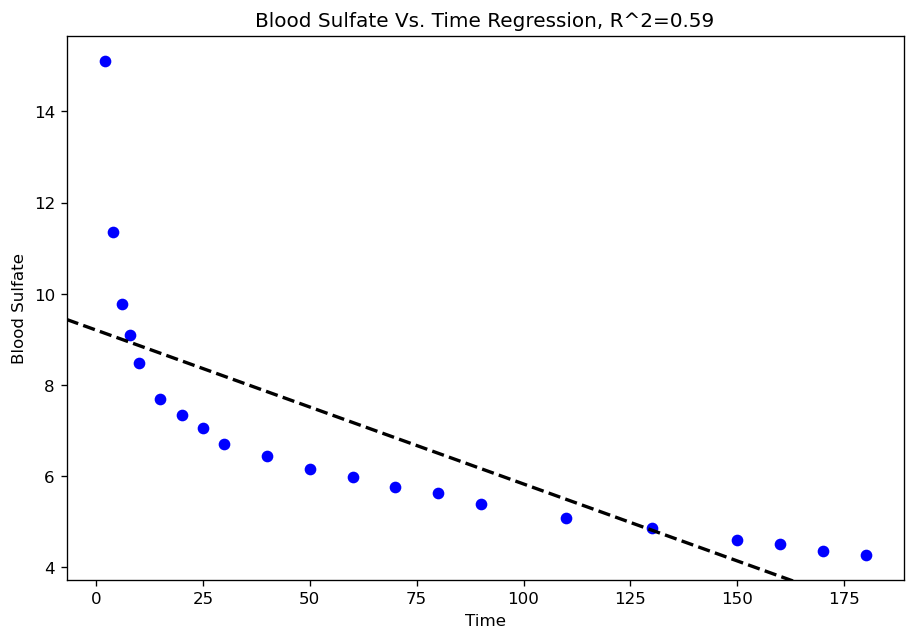

In [18]:
# Visualization
def visualize(lr=0.0001, num_iter=500000):
    X_1 = df_1['Hours'].values.reshape(-1,1)
    Y_1 = df_1['Sulfate'].values.reshape(-1)

    fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

    theta_1 = linear_gradient_descent(X_1,Y_1, lr=lr, num_iter=num_iter)
    ax = draw_regression(X_1,Y_1,theta_1,ax)

    residuals_1 = linear_residuals(X_1, theta_1, Y_1)
    fitted_1 = linear_predict(X_1, theta_1)

    r2_1 = r2_score(Y_1, fitted_1) #computes the R^2 score

    ax.set_xlabel('Time')
    ax.set_ylabel('Blood Sulfate')
    _ = ax.set_title('Blood Sulfate Vs. Time Regression, R^2=%.2f' %r2_1)
visualize()

## Task 6 Gradient Descent with Data Normalization

You may be wondering why we needed so many iterations (500,000) and very small learning rate (0.0001) for gradient descent. 

If you don't believe the given hyperparameters, you could try some others. For example, if we use fewer iterations: 

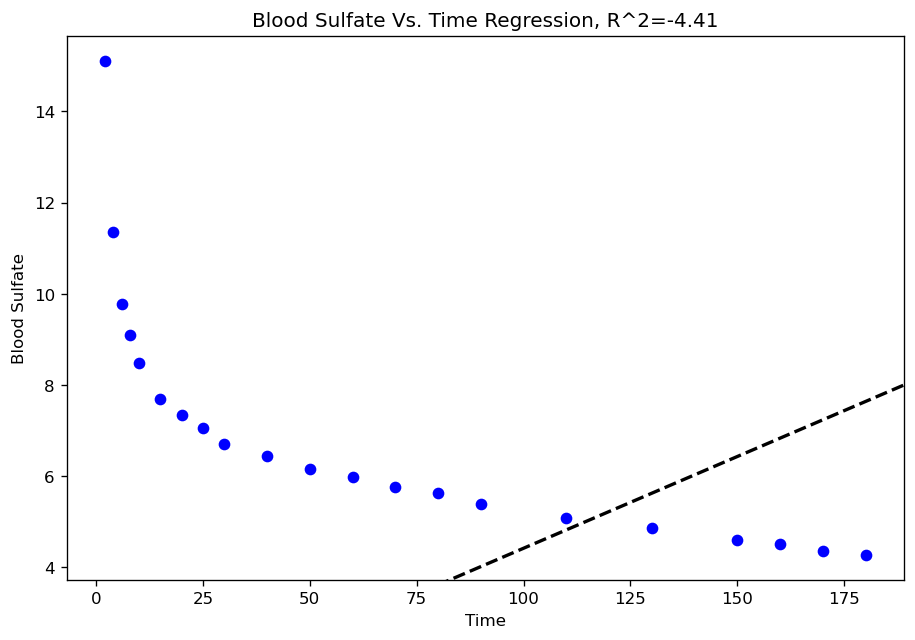

In [19]:
visualize(lr=0.0001, num_iter=1000) # Replace `None` with different values like num_iter=100

We will be far away from obtaining the correct result.

Or if we use larger learning rate:

/tmp/ipykernel_54/1041355562.py:16: RuntimeWarning: overflow encountered in matmul
  theta = theta - lr/N * X_constant.T @ (X_constant@theta - Y_col)
/tmp/ipykernel_54/1041355562.py:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - lr/N * X_constant.T @ (X_constant@theta - Y_col)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

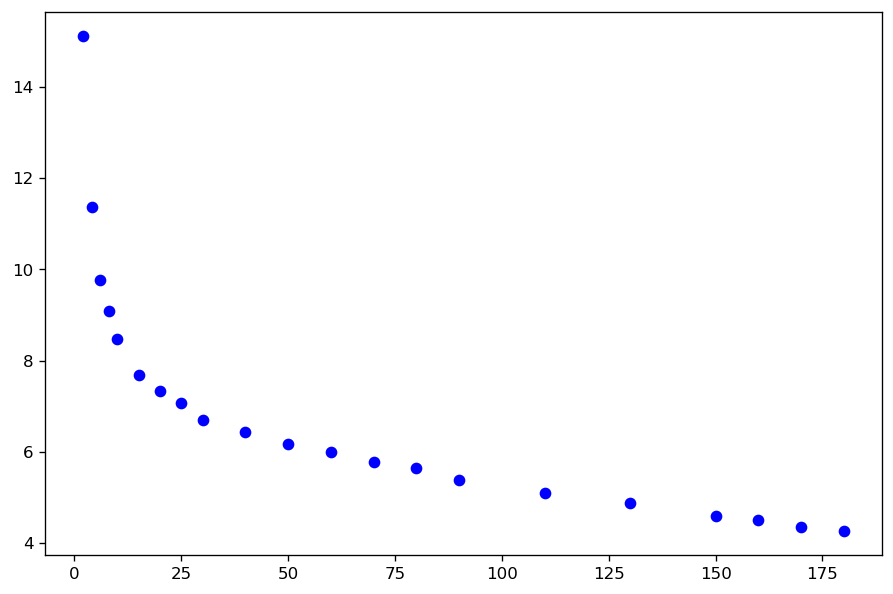

In [20]:
visualize(lr=.001, num_iter=500000) # Replace `None` with different values like lr=0.001. Also try smaller values for num_iter (e.g. 100) if you encounter an overflow.

The large learning rate causes the algorithm to mover further away from the global minimum.

### **But can we optimize our algorithm so that we don't need so many iterations!**

**Why it happened:** In short, the reason why we need so many iterations is because the X variable (time) and Y variable (blood sulfate) are in different scales. X ranges from about 4 to 15, but Y ranges from about 0 to 180. So during gradient descend, the gradient is mostly dominated by values from Y (because Y is much larger). But if we finetune the hyperparameters (learning_rate, num_iter, etc.), the algorithm will still work, because theoretically gradient descent will take us to the global minimum at some time. But we just need much longer time.

**What should we do:** To reduce the number of iterations to run, or to speed up convergence, we need to make the X and Y variables in the same or at least similar scales. For this example, one way would be to do linear regression in log-log scale, where you can see the scales of X and Y are similar. But this is a special case of being lucky. A more standard way is to normalize the data. For example, we can do z-score normalization. For each data point, we do

$$
\widetilde X = \frac{X - \overline{X}}{\sigma(X)} \quad \text{and} \quad \widetilde Y = \frac{Y - \overline{Y}}{\sigma(Y)}
$$

Here, $\overline{X}$ is the mean of $X$ and $\sigma{(X)}$ is the standard deviation of $X$.

Then we perform gradient descent on the normalized data. After we get the $\theta$, to apply it to a new data point, we could first use $\overline{X}$ and $\sigma{(X)}$ to transform the new data point to our old coordinates. After we get the output, we then use $\overline{Y}$ and $\sigma{(Y)}$ to transform it back to its original scale.

**The codes are given to you below:**

In [ ]:
def normalize(X_1, Y_1, x_norm, x_std, y_norm, y_std):
    return (X_1 - x_norm) / x_std, (Y_1 - y_norm) / y_std

def denormalize(X_1, Y_1, x_norm, x_std, y_norm, y_std):
    return X_1 * x_std + x_norm, Y_1 * y_std + y_norm

Try to play around by setting different values to the hyperparemeters by changing `None` in the code below. Some examples you may want to try are
  1. lr = 0.0001, num_iter = 500000
  2. lr = 0.01,   num_iter = 500000
  3. lr = 0.01,   num_iter = 1000
  4. lr = 0.0001, num_iter = 1000

Which one do you think is better?


In [ ]:
lr = .001
num_iter = 100000

def visualize_normalize(method, lr, num_iter):
    X_1 = df_1['Hours'].values.reshape(-1,1)
    Y_1 = df_1['Sulfate'].values.reshape(-1)

    x_norm, x_std = np.mean(X_1), np.std(X_1)
    y_norm, y_std = np.mean(Y_1), np.std(Y_1)

    X_1, Y_1 = normalize(X_1, Y_1, x_norm, x_std, y_norm, y_std)

    fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

    theta_1 = method(X_1,Y_1, lr=lr, num_iter=num_iter)

    beta_2 = np.array([-theta_1[1]*x_norm*y_std/x_std+theta_1[0]*y_std+y_norm, theta_1[1]*y_std/x_std])

    X_1, Y_1 = denormalize(X_1, Y_1, x_norm, x_std, y_norm, y_std)

    ax = draw_regression(X_1,Y_1,beta_2,ax)

    fitted_1 = linear_predict(X_1, beta_2)

    r2_1 = r2_score(Y_1, fitted_1) #computes the R^2 score

    ax.set_xlabel('Time')
    ax.set_ylabel('Blood Sulfate')
    _ = ax.set_title('Blood Sulfate Vs. Time Regression, R^2=%.2f' %r2_1)
visualize_normalize(method=linear_gradient_descent, lr=lr, num_iter=num_iter)

## Task 7 Stochastic Gradient Descent

In real-world applications, people usually do stochastic gradient descent (SGD) instead of gradient descent. There are multiple reasons for this.

1. In real-world datasets, it's not a surprise that we may be dealing with data of hundreds of GBs. In that case, it's impossible for us to load the whole dataset into memory.

2. It will be computationally fast if we only process one sample at a time.

3. We may not be stuck on certain local minimum, more frequent gradient updates makes it faster to converge to the global minimum.

**Note:** Remember from the lecture, in SGD, we **update** the $\theta$ after we calculate the gradient using only **one** data sample. The order we take in the data samples will be shuffled, but we still need to take in **all** data points in one epoch. Each epoch involves going through each sample in the training set one after the other and updating $\theta$ as
$$\theta \leftarrow \theta - \alpha x^{(j)}(\theta^\intercal x^{(j)} - y^{(j)})$$
where $(x^{(j)}, y^{(j)})$ is the $j$th sample in the training set that is being used to update $\theta$ ($x^{(j)}$ is a column vector with the dummy 1), and $\alpha$ is the *learning rate*.

**Note:** Please don't modify lr and num_iter. Otherwise the autograder won't work.

In [ ]:
#grade

def linear_sgd(X,Y, lr=0.0001, num_iter=10000):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N
    ind = list(range(N))
    
    Y_col = Y.reshape(-1,1)
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1)
    theta = np.zeros((d+1, 1))

    for i in range(num_iter):
        np.random.seed(1234)
        np.random.shuffle(ind) #shuffle the training set
        
        for j in ind:
            x_j, y_j = X_constant[j].reshape(d+1, 1), Y_col[j].reshape(1, 1) 
            ### WRITE YOUR CODE HERE
            

            theta = theta - lr * x_j@(theta.T@x_j - y_j)
        
            
            
            
            ### END STUDENT SOLUTION
    return theta

def linear_gradient_descent(X,Y, lr=0.0001, num_iter=500000):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N

    Y_col = Y.reshape(-1,1)
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1)

    theta = np.zeros((d+1, 1))

    for i in range(num_iter):
        ### WRITE YOUR SOLUTION HERE
        theta = theta - lr/N * X_constant.T @ (X_constant@theta - Y_col)

        ### END STUDENT SOLUTION
    return theta

In [ ]:
%%time
#SAMPLE TEST CASE
some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_Y = np.sum(some_X, axis=1)
some_theta = linear_sgd(some_X, some_Y)
print(some_theta)
# assert np.array_equal(some_theta.round(3), np.array([[ -0.01],
#                                                     [ 0.999],
#                                                     [ 1.001],
#                                                     [ 1.001],
#                                                     [ 0.999],
#                                                     [ 1.000]]))

In [ ]:
visualize_normalize(method=linear_sgd, lr=0.01, num_iter=1000)

In [29]:
#grade

def linear_sgd(X,Y, lr=0.0001, num_iter=500000):

    n = X.shape[0]
    d = X.shape[1]
    
    Y = Y.flatten()
    X = np.concatenate([np.ones((n,1)), X], axis=1)
    theta = np.zeros(d+1)

    for k in range(num_iter):
        
        for i in range(n):
            
            x_i, y_i = X[i].flatten(), Y[i]
            
            inner = 0
            
            for idx in range(len(x_i)):
                
                inner += theta[idx] * x_i[idx]
            
            update = lr * (inner - y_i)
            
            for j in range(d+1):
                
                theta[j] = theta[j] - x_i[j] * update 
            

    return theta

def linear_gradient_descent(X,Y, lr=0.0001, num_iter=500000):

    n = X.shape[0]
    d = X.shape[1]

    Y = Y.flatten()
    X = np.concatenate([np.ones((n,1)), X], axis=1)

    theta = np.zeros(d+1)

    for k in range(num_iter):
        
        for j in range(0, d+1):
            
            s = 0
            
            for i in range(0, n):
                
                x_i, y_i = X[i].flatten(), Y[i]
                
                inner = 0
                
                for idx in range(len(x_i)):
                
                    inner += theta[idx] * x_i[idx]
                
                s += x_i[j] * (inner - y_i)
                
            theta[j] = theta[j] - lr*s
                
                


    return theta

In [30]:
%%time
some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_Y = np.sum(some_X, axis=1)
some_theta = linear_sgd(some_X, some_Y)
print(some_theta)

[-0.00557424  0.99949749  1.00074036  1.00065558  0.99925906  0.99979216]
CPU times: user 16.4 s, sys: 145 ms, total: 16.6 s
Wall time: 18.4 s


In [31]:
%%time
# SAMPLE TEST CASE
# some_X = (np.arange(35).reshape(7,5) ** 13) % 20
# some_Y = np.sum(some_X, axis=1)

some_theta = linear_gradient_descent(some_X, some_Y)
print(some_theta)
# assert np.array_equal(some_theta.round(3), np.array([[ -0.009],
#                                                     [ 0.999],
#                                                     [ 1.001],
#                                                     [ 1.001],
#                                                     [ 0.999],
#                                                     [ 1.000]]))

[-0.00923955  0.9991636   1.00122991  1.00108786  0.99876621  0.9996543 ]
CPU times: user 59.6 s, sys: 96.4 ms, total: 59.7 s
Wall time: 1min 6s
